<a href="https://colab.research.google.com/github/noushadkhan01/Grokking-Deep-Learning/blob/master/Chapter9%20-%20Intro%20to%20Activation%20Functions%20-%20Modeling%20Probabilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upgrading our MNIST Network

- Add **tanh** activation function to hidden layers

- - **tanh** have an output between -1 and 1 so it's more reliable than relu sometimes
- Add **softmax** to output layer it will give probability of every digit in single layer output

In [15]:
!git clone https://github.com/noushadkhan01/Grokking-Deep-Learning.git

Cloning into 'Grokking-Deep-Learning'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 293 (delta 17), reused 0 (delta 0), pack-reused 258
Receiving objects: 100% (293/293), 21.66 MiB | 20.93 MiB/s, done.
Resolving deltas: 100% (128/128), done.


In [16]:
!ls

Grokking-Deep-Learning	sample_data


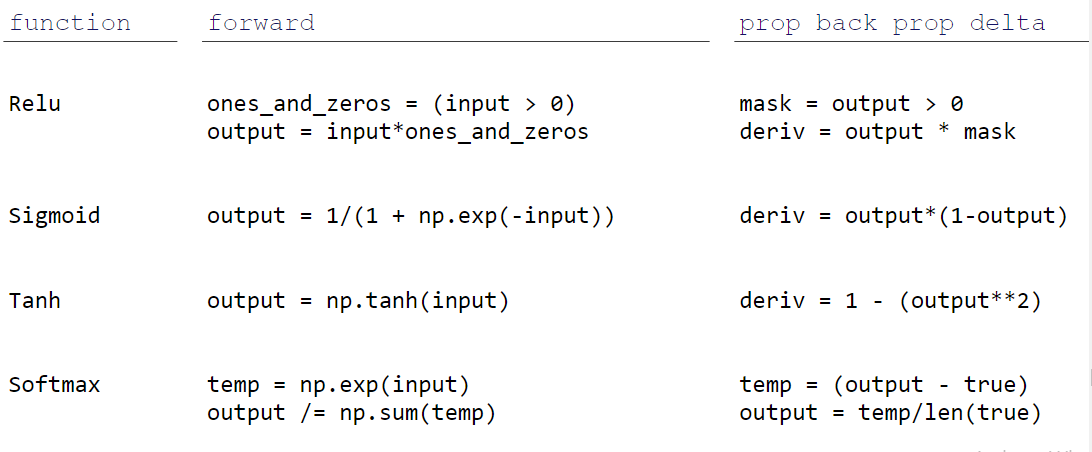

In [29]:
from IPython.display import Image, display
Image('Grokking-Deep-Learning/activation function\'s derivatives.png', width = 600, height = 350)

In [35]:
import numpy as np, sys
np.random.seed(1)

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

one_hot_labels = np.zeros((len(labels),10))
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

def tanh(x):
    return np.tanh(x)

def tanh2deriv(output):
    return 1 - (output ** 2)

def softmax(x):
    temp = np.exp(x)
    return temp / np.sum(temp, axis=1, keepdims=True)

alpha, iterations, hidden_size = (2, 300, 100)
pixels_per_image, num_labels = (784, 10)
batch_size = 100

weights_0_1 = 0.02*np.random.random((pixels_per_image,hidden_size))-0.01
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1
train_error = []
test_error = []
for j in range(iterations):
    correct_cnt = 0
    for i in range(int(len(images) / batch_size)):
        batch_start, batch_end=((i * batch_size),((i+1)*batch_size))
        layer_0 = images[batch_start:batch_end]
        layer_1 = tanh(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2,size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = softmax(np.dot(layer_1,weights_1_2))
        for k in range(batch_size):
            correct_cnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1]))

        layer_2_delta = (labels[batch_start:batch_end]-layer_2) / (batch_size * layer_2.shape[0])
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * tanh2deriv(layer_1)
        layer_1_delta *= dropout_mask
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
    train_error.append(correct_cnt/len(images))
    
    #for test_images
    test_correct_cnt = 0
    for i in range(len(test_images)):

        layer_0 = test_images[i:i+1]
        layer_1 = tanh(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
    test_error.append(test_correct_cnt/len(test_images))
    if(j % 10 == 0):
        sys.stdout.write("\n"+ \
         "I:" + str(j) + \
         " Test-Acc:"+str(test_correct_cnt/float(len(test_images)))+\
         " Train-Acc:" + str(correct_cnt/float(len(images))))


I:0 Test-Acc:0.394 Train-Acc:0.156
I:10 Test-Acc:0.6867 Train-Acc:0.723
I:20 Test-Acc:0.7025 Train-Acc:0.732
I:30 Test-Acc:0.734 Train-Acc:0.763
I:40 Test-Acc:0.7663 Train-Acc:0.794
I:50 Test-Acc:0.7913 Train-Acc:0.819
I:60 Test-Acc:0.8102 Train-Acc:0.849
I:70 Test-Acc:0.8228 Train-Acc:0.864
I:80 Test-Acc:0.831 Train-Acc:0.867
I:90 Test-Acc:0.8364 Train-Acc:0.885
I:100 Test-Acc:0.8407 Train-Acc:0.883
I:110 Test-Acc:0.845 Train-Acc:0.891
I:120 Test-Acc:0.8481 Train-Acc:0.901
I:130 Test-Acc:0.8505 Train-Acc:0.901
I:140 Test-Acc:0.8526 Train-Acc:0.905
I:150 Test-Acc:0.8555 Train-Acc:0.914
I:160 Test-Acc:0.8577 Train-Acc:0.925
I:170 Test-Acc:0.8596 Train-Acc:0.918
I:180 Test-Acc:0.8619 Train-Acc:0.933
I:190 Test-Acc:0.863 Train-Acc:0.933
I:200 Test-Acc:0.8642 Train-Acc:0.926
I:210 Test-Acc:0.8653 Train-Acc:0.931
I:220 Test-Acc:0.8668 Train-Acc:0.93
I:230 Test-Acc:0.8672 Train-Acc:0.937
I:240 Test-Acc:0.8681 Train-Acc:0.938
I:250 Test-Acc:0.8687 Train-Acc:0.937
I:260 Test-Acc:0.8684 Train-

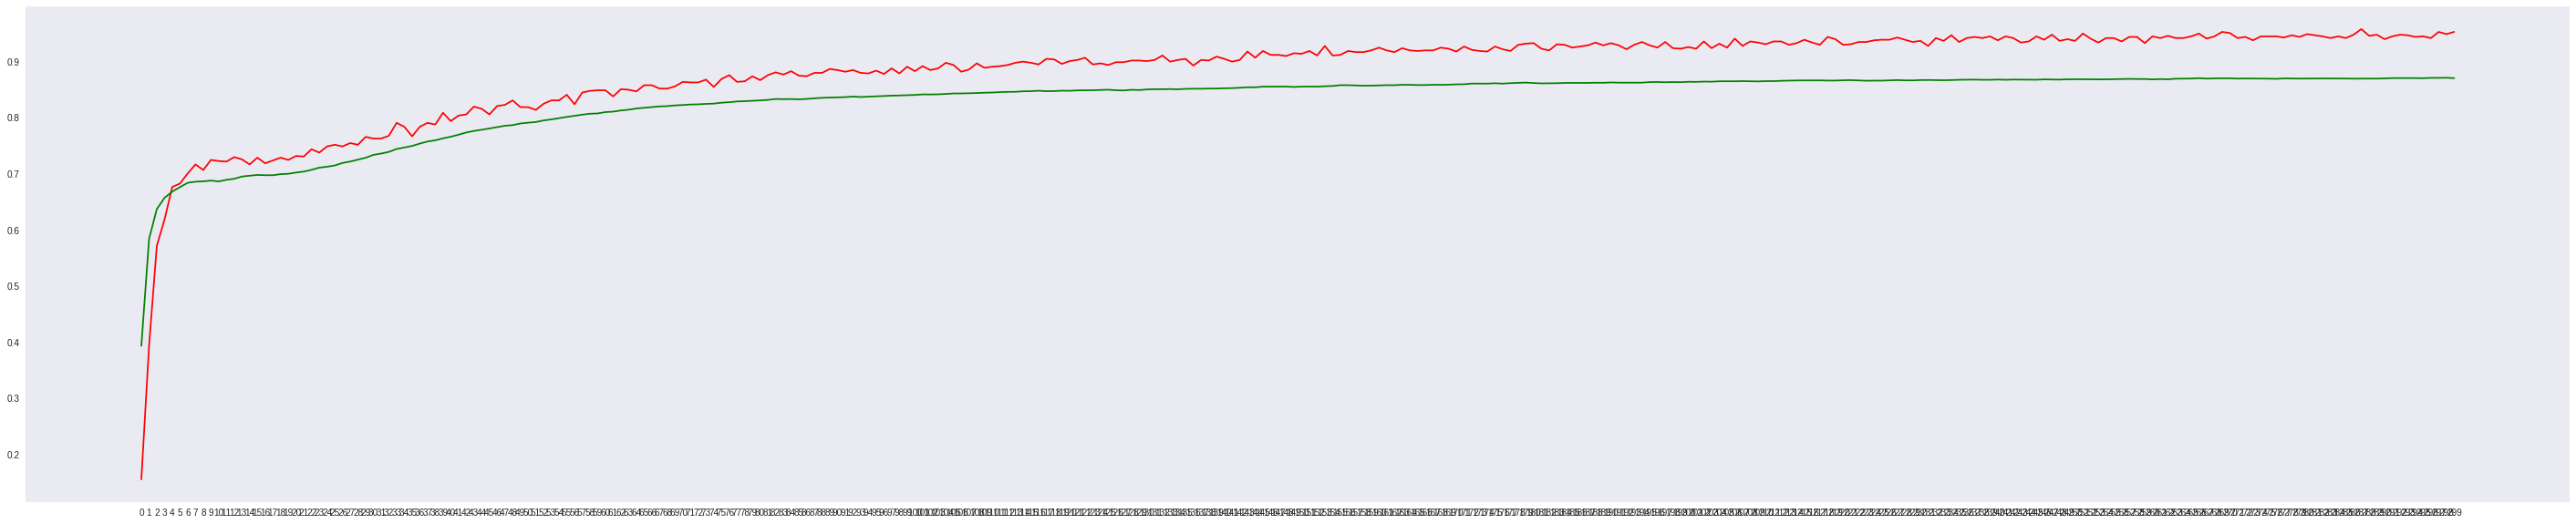

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize = (50, 10))
plt.plot(range(300), train_error, c = 'r', label = 'Train Error')
plt.plot(range(300), test_error, c = 'g', label = 'Test Error')
plt.xticks(range(300))
plt.grid()
plt.show()